# Campaña "Seguro Vivienda" de compañía financiera

Los correos a todos los potenciales clientes de un producto no son una estrategia de marketing efectiva, ya que muchos de ellos no están interesados. Identificando a los más propensos a contratar el producto se podría dirigir la campaña de marketing con mayor precisión y reducir su coste.

La compañía financiera ofrece seguros, créditos, etc. y nos proporciona un listado de clientes a los que ha dirigido una campaña de marketing ofreciendo el nuevo producto “Seguro Vivienda”. En el fichero se encuentran los datos de dichos clientes, así como información de otros productos ya contratados y si contrataron el nuevo producto o no. También se dispone de un fichero con información sociodemográfica asociada a diferentes zonas de residencia.

Se pide que planifiquemos una campaña más efectiva sobre un segundo conjunto de clientes, para lo que utilizaremos el primer conjunto para construir modelos predictivos que usaremos sobre el segundo conjunto para seleccionar los clientes más propensos a contratar el producto. Una vez seleccionados los candidatos, la compañía les ofrecerá el producto y medirá la eficacia del modelo según la proporción de ellos que lo contratan.

## Conjuntos de datos
### Clientes
* ID_Cliente: identificador único del cliente
* Fecha_Nacimiento: fecha de nacimiento del cliente
* Fecha_Alta: fecha de alta del cliente
* Sexo: sexo del cliente
* ID_Zona: identificador único de zona de residencia
* Productos_X: número de productos contratados por tipo
* Gasto_X: gasto anual en los distintos productos
* Seguro_Vivienda: el cliente contrató el producto ofrecido o no

### Zonas
* ID_Zona: identificador único de zona
* Tipo_X: porcentaje de población por tipología familiar
* Educacion_X: porcentaje de población por nivel de estudios
* Poblacion_X: porcentaje de población por tipo de población
* Vivienda_X: porcentaje de población por tipo de vivienda
* Medico_X: porcentaje de población por tipo de seguro médico
* Ingresos_X: porcentaje de población por nivel de ingresos

## Cruce de datos

Primero vamos a cruzar los datos de clientes con los datos de zonas, para tener toda la información en una sola tabla por cada cliente. En el siguiente código, deberás introducir en la variable 'datos_path' la ruta a la carpeta donde se encuentran los ficheros de datos, por ejemplo "~/Escritorio" si están en el escritorio.

In [1]:
#Complete your code
datos_path='../data/'

A continuación leemos los ficheros y los guardamos en su correspondiente dataframe.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import os

%matplotlib inline

clientes_file = "Clientes_train.csv"
zonas_file = "Zonas.csv"

clientes = pd.read_csv(os.path.join( datos_path,clientes_file), sep='\t')
zonas = pd.read_csv(os.path.join(datos_path, zonas_file), sep='\t')

datos = pd.merge(clientes, zonas, on="ID_Zona", how="inner")

targets = datos["Seguro_Vivienda"]
variables = datos.drop(["Seguro_Vivienda"], axis=1, inplace=False)


## Estudio de datos

Hacemos un estudio de los datos con el objetivo de comprenderlos y encontrar en ellos posibles anomalías. Empezamos por una inspección visual de una muestra de filas de la tabla para ver la estructura de los datos:

In [3]:
datos

,ID_Cliente,Fecha_Nacimiento,Fecha_Alta,Sexo,ID_Zona,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,...,Poblacion_Funcionario,Poblacion_Trabajador_Cualificado,Poblacion_Trabajador_No_Cualificado,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado,Medico_Seguridad_Social,Ingresos_Mas_De_40000,Ingresos_De_20000_Hasta_40000,Ingresos_Hasta_20000
0,C3088,29/03/1968,27/03/1989,Mujer,Z1143,0,1,0,0.00,617.55,...,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.30
1,C3441,01/05/1962,26/12/1984,Hombre,Z1143,0,0,0,0.00,0.00,...,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.30
2,C0412,19/01/1967,29/04/1987,Hombre,Z1143,0,0,1,0.00,0.00,...,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.30
3,C3565,20/04/1948,06/09/1969,Hombre,Z1143,0,1,0,0.00,3315.54,...,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.30
4,C0315,28/07/1979,18/06/2001,Mujer,Z1143,0,1,2,0.00,2561.45,...,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,C3039,22/06/1985,09/04/2006,Hombre,Z0006,0,0,0,0.00,0.00,...,68.49,0.00,0.00,100.00,0.00,31.89,68.11,0.00,0.00,100.00
2923,C2696,30/03/1981,10/09/2002,Hombre,Z0938,0,0,0,0.00,0.00,...,15.74,22.97,46.50,100.00,0.00,42.53,57.47,0.00,50.54,49.46
2924,C2191,22/04/1958,30/11/1979,Hombre,Z0787,0,1,0,0.00,3586.77,...,15.65,0.00,84.35,91.02,8.98,15.08,84.92,0.00,3.23,96.77
2925,C0959,13/12/1980,29/02/2004,Mujer,Z1424,1,0,2,181.56,1968.15,...,83.10,6.66,6.78,91.91,8.09,31.24,68.76,0.00,0.00,100.00


In [32]:
datos.isnull().sum()

ID_Cliente                             0
Fecha_Nacimiento                       0
Fecha_Alta                             0
Sexo                                   0
ID_Zona                                0
Productos_Vida                         0
Productos_Vehiculos                    0
Productos_Otros                        0
Gasto_Vida                             0
Gasto_Vehiculos                        0
Gasto_Otros                            0
Seguro_Vivienda                        0
Tipo_Familia                           0
Tipo_Pareja                            0
Tipo_Soltero                           0
Educacion_Superior                     0
Educacion_Media                        0
Educacion_Baja                         0
Poblacion_Empresario                   0
Poblacion_Funcionario                  0
Poblacion_Trabajador_Cualificado       0
Poblacion_Trabajador_No_Cualificado    0
Vivienda_Propiedad                     0
Vivienda_Alquiler                      0
Medico_Seguro_Pr

Seguimos con un estudio de estadísticos básicos que nos indiquen el rango de valores de cada variable (columna) numérica:

In [35]:
variables._get_numeric_data().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Productos_Vida                       2927 non-null   int64  
 1   Productos_Vehiculos                  2927 non-null   int64  
 2   Productos_Otros                      2927 non-null   int64  
 3   Gasto_Vida                           2927 non-null   float64
 4   Gasto_Vehiculos                      2927 non-null   float64
 5   Gasto_Otros                          2927 non-null   float64
 6   Tipo_Familia                         2927 non-null   float64
 7   Tipo_Pareja                          2927 non-null   float64
 8   Tipo_Soltero                         2927 non-null   float64
 9   Educacion_Superior                   2927 non-null   float64
 10  Educacion_Media                      2927 non-null   float64
 11  Educacion_Baja                

In [37]:
variables._get_numeric_data().describe()

,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,Gasto_Otros,Tipo_Familia,Tipo_Pareja,Tipo_Soltero,Educacion_Superior,...,Poblacion_Funcionario,Poblacion_Trabajador_Cualificado,Poblacion_Trabajador_No_Cualificado,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado,Medico_Seguridad_Social,Ingresos_Mas_De_40000,Ingresos_De_20000_Hasta_40000,Ingresos_Hasta_20000
count,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,...,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000
mean,0.080287,0.750940,1.066279,37.133915,1583.312689,273.471145,47.392026,34.010779,18.597458,14.136502,...,29.345565,22.355572,26.771343,54.007017,45.992983,27.863485,72.136515,1.449713,6.700150,91.850126
std,0.365148,0.795887,1.001220,289.125502,2008.636888,741.281246,24.955844,20.001426,20.498031,18.661422,...,21.739949,20.322406,21.439939,37.375465,37.375465,24.390093,24.390093,5.362351,12.187754,14.078293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.410000,19.980000,0.000000,0.000000,...,15.230000,3.880000,9.420000,14.900000,8.175000,7.275000,56.530000,0.000000,0.000000,90.120000
50%,0.000000,1.000000,1.000000,0.000000,649.610000,117.630000,48.180000,32.140000,14.350000,6.440000,...,27.480000,19.550000,22.220000,58.410000,41.590000,20.570000,79.430000,0.000000,0.000000,99.990000
75%,0.000000,1.000000,2.000000,0.000000,2948.910000,303.705000,65.450000,44.705000,30.530000,20.700000,...,41.150000,33.700000,41.020000,91.825000,85.100000,43.470000,92.725000,0.000000,8.325000,100.000000
max,4.000000,10.000000,7.000000,4934.590000,16735.670000,17188.620000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.010000


Grafique el histograma de la variable "Gasto_Vehiculos" del dataframe datos

Text(0, 0.5, 'Probabilidad de densidad')

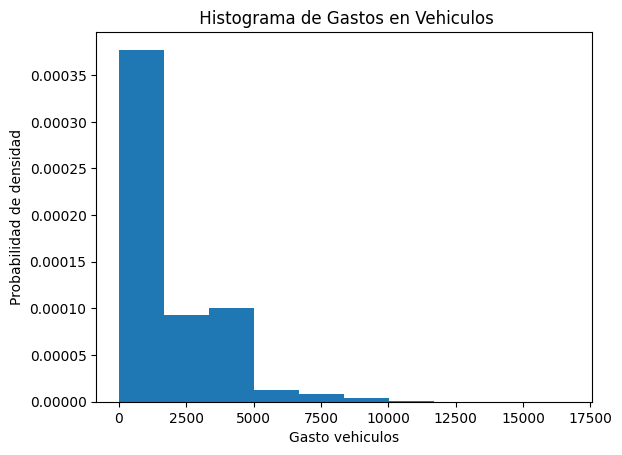

In [38]:
#datos['Gasto_Vehiculos'].hist(bins=10)
plt.hist(variables._get_numeric_data()['Gasto_Vehiculos'],density=True)
plt.title(' Histograma de Gastos en Vehiculos')
plt.xlabel('Gasto vehiculos')
plt.ylabel('Probabilidad de densidad')

Y, también, un boxplot de la misma.

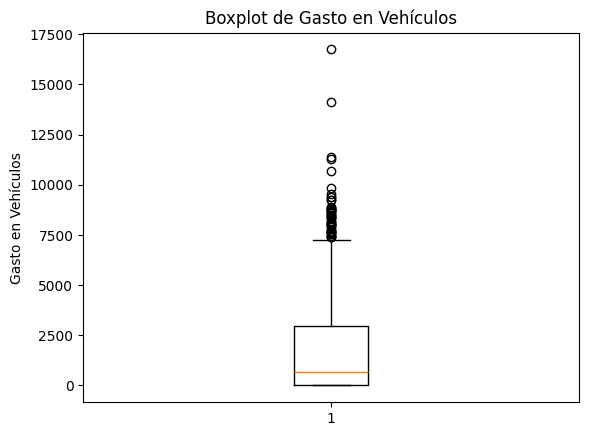

In [40]:
import matplotlib.pyplot as plt

# Creando el boxplot de la columna 'Gasto_Vehiculos'
plt.boxplot(variables._get_numeric_data()['Gasto_Vehiculos'])
plt.title('Boxplot de Gasto en Vehículos')
plt.ylabel('Gasto en Vehículos')
plt.show()




También podemos obtener información de variables categóricas. En este caso, imprima por pantalla el conteo del número de muestras que se tengan por sexo  del dataframe variables y grafique un diagrama de barras por sexo.

In [9]:
datos['Sexo'].value_counts()

Sexo
Hombre    2125
Mujer      802
Name: count, dtype: int64

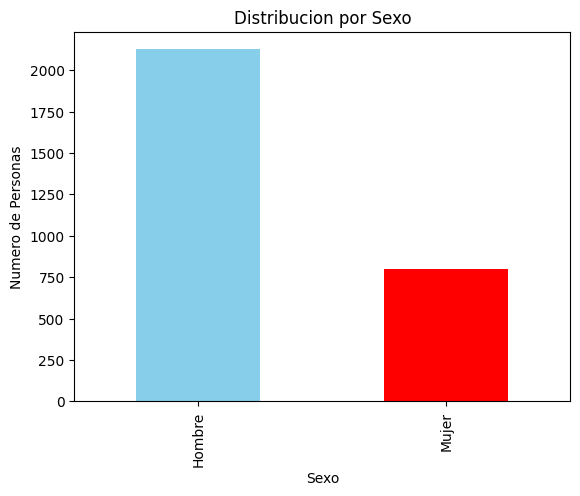

In [10]:
datos['Sexo'].value_counts().plot(kind='bar',color=['skyblue', 'red'])
plt.title('Distribucion por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Numero de Personas' )
plt.show()

## Selección de variables

Hay diversos métodos que nos permiten identificar las mejores variables para resolver nuestro problema. Scikit permite identificar las mejores variables según diversos tests estadísticos, aunque para algunos de ellos debemos utilizar sólo las variables numéricas:

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2 = SelectKBest(chi2, k=10).fit(variables._get_numeric_data(), targets)
for (col, sel) in zip(variables._get_numeric_data().columns.values, chi2.get_support()):
    if sel:
        print(col)
seleccion = chi2.transform(variables._get_numeric_data())

Gasto_Vida
Gasto_Vehiculos
Gasto_Otros
Educacion_Superior
Educacion_Baja
Poblacion_Empresario
Poblacion_Trabajador_No_Cualificado
Vivienda_Propiedad
Vivienda_Alquiler
Medico_Seguro_Privado


Veamos cómo queda representada una muestra del dataset respecto de las dos mejores variables:

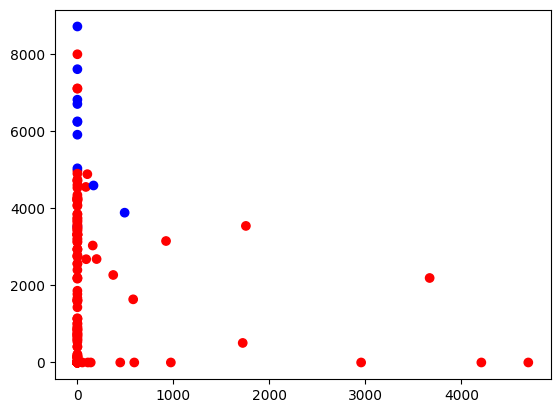

In [12]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(seleccion[1:200, 0], seleccion[1:200, 1], c=targets[1:200], cmap=cm_bright)
plt.show()

Se puede ver cómo al representar las muestras respecto de estas dos variables, los casos de clientes que han contratado el producto se distinguen más fácilmente, ya que tienden a tener un valor alto en una de ellas (puntos azules). Por tanto, estas variables parecen ser buenas a la hora de distinguir casos positivos y negativos.

Cuando el proceso de modelización es costoso, reducir el número de variables puede ser de gran ayuda. Las técnicas de selección de variables se usan ampliamente en los procesos de análisis de datos y modelización. Veremos algunas técnicas en clase.

## Transformación de variables

Es posible también realizar una transformación de variables, obteniendo combinaciones, normalmente lineales, de las variables originales que nos den mejores resultados al introducirlas en los modelos predictivos. SVD, PCA o ICA son algunos ejemplos:

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(variables._get_numeric_data())
print(pca.components_)
print(pca.explained_variance_ratio_)
transformacion = pca.transform(variables._get_numeric_data())

[[ 1.13272484e-05  2.49947982e-04  7.73521138e-05  3.07643903e-03
   9.98926227e-01  4.61104027e-02  4.83515690e-04  9.64832896e-05
  -5.79992186e-04  4.74753804e-04 -3.82916687e-05 -4.36431988e-04
   7.76395166e-04 -1.67202699e-04 -4.09448513e-04 -1.99807434e-04
   1.92596102e-03 -1.92596102e-03  8.38968477e-04 -8.38968477e-04
   1.45851838e-06  1.21989814e-04 -1.23418552e-04]
 [ 2.29104271e-05  9.00357437e-05  4.87987707e-04  1.41580431e-02
  -4.61751332e-02  9.98791715e-01  5.98078053e-05  7.42107667e-04
  -8.02017454e-04 -3.99451289e-04  1.67935439e-04  2.31606373e-04
   1.51812400e-03 -1.35632862e-03 -8.08457612e-04  6.46470913e-04
   5.99488232e-03 -5.99488232e-03  1.36589999e-03 -1.36589999e-03
  -3.22428480e-05 -3.69649764e-05  6.92457105e-05]
 [ 5.40217286e-04 -2.46878994e-05  1.66385989e-04  9.99876166e-01
  -2.43492037e-03 -1.43238167e-02  2.16244726e-03 -2.04578733e-05
  -2.14247137e-03  4.83553780e-04  1.64118780e-03 -2.12421051e-03
   9.03270170e-04  5.64289594e-04 -6.954

Veamos cómo queda representada una muestra del dataset respecto de las dos mejores variables sintéticas:

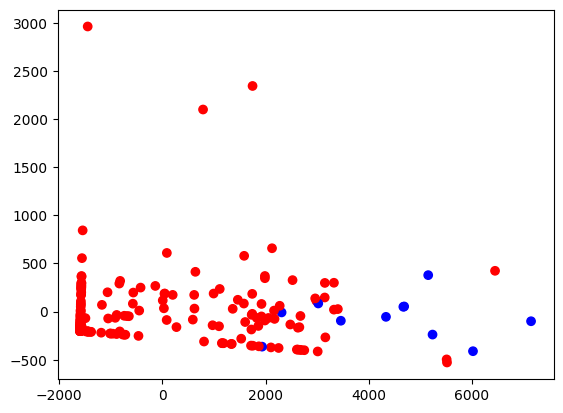

In [14]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(transformacion[1:200, 0], transformacion[1:200, 1], c=targets[1:200], cmap=cm_bright)
plt.show()

Como en el caso anterior, se puede ver que los casos positivos se pueden separar más fácilmente de los negativos al quedar la mayoría de ellos a la derecha de la gráfica.

Es habitual que las variables sintéticas generadas con métodos como PCA sean incluso mejores que las mejores variables seleccionadas con otras técnicas. Como contrapartida, el cálculo de estas variables es costoso y suele ser difícil darles un sentido de negocio.

¿Podrías probar varias técnicas de selección y transformación de variables? Ten en cuenta que no sólo es importante lo buenas que sean las variables finales para la predicción, sino también que el coste de calcularlas sea razonable y que seas capaz de explicar y justificar estas variables en caso de que el cliente lo solicite.

* http://scikit-learn.org/stable/modules/feature_selection.html
* http://scikit-learn.org/stable/modules/decomposition.html

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [16]:
estimador = RandomForestClassifier()
X = variables._get_numeric_data()
y = targets


# Inicializa RFE con el estimador y el número deseado de características
selector = RFE(estimador, n_features_to_select=10)

# Ajusta RFE al conjunto completo de datos
selector.fit(X,y)

# Transforma los datos
X_transformado = selector.transform(X)

# Muestra las características seleccionadas
caracteristicas_seleccionadas = X.columns[selector.support_]
print("Características :", caracteristicas_seleccionadas)

Características : Index(['Productos_Vehiculos', 'Gasto_Vehiculos', 'Gasto_Otros', 'Tipo_Familia',
       'Educacion_Superior', 'Educacion_Media', 'Educacion_Baja',
       'Poblacion_Empresario', 'Poblacion_Funcionario',
       'Medico_Seguridad_Social'],
      dtype='object')


## Entrenamiento del modelo

No es evidente cuál es el mejor tipo de modelo para resolver nuestro problema. Por lo tanto, empezaremos con los modelos más sencillos y estables, los modelos lineales. Si los resultados no son suficientemente buenos, probaremos modelos más complejos.

Utilizaremos las variables originales, seleccionadas o transformadas y estudiaremos medidas de calidad como la precisión y el "recall" para evaluar cada uno de los modelos. Para ello, dividiremos el conjunto de datos de entrenamiento de modo que los primeros 2000 patrones servirán para entrenar los modelos, y el resto para validar:

In [17]:
from sklearn.model_selection import train_test_split
X = variables._get_numeric_data()  # Codificación one-hot para las variables categóricas
y = targets

#X = variables = datos.drop(["Seguro_Vivienda"], axis=1, inplace=False)
#y = targets = datos["Seguro_Vivienda"]
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.20, random_state=2000)


In [18]:
import pandas as pd

# Dividir los datos en conjuntos de entrenamiento y validación
X_train = X.iloc[:2000, :]
y_train = y.iloc[:2000]

X_val = X.iloc[2000:, :]
y_val = y.iloc[2000:]

El primer modelo a probar serán la regresión logística:

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score

# Crear el objeto StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de validación
X_val_scaled = scaler.transform(X_val)

# Crear y entrenar el modelo de regresión logística
logistic_model_scaled = LogisticRegression(max_iter=1000)
logistic_model_scaled.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de validación
y_pred_val_scaled = logistic_model_scaled.predict(X_val_scaled)

# Calcular precisión y recall
precision_scaled = accuracy_score(y_val, y_pred_val_scaled)
recall_scaled = recall_score(y_val, y_pred_val_scaled)

# Imprimir los resultados
print("Precisión del modelo con escalado:", precision_scaled)
print("Recall del modelo con escalado:", recall_scaled)


Precisión del modelo con escalado: 0.9590075512405609
Recall del modelo con escalado: 0.44642857142857145


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Creando un pipeline que primero estandariza los datos y luego aplica la regresión logística
logr= make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, solver='liblinear'))

# Entrenamiento del modelo
logr.fit(X_train, y_train)

# Evaluación del modelo
precision = logr.score(X_val, y_val)
y_pred = logr.predict(X_val)
recall = recall_score(y_val, y_pred)
print("Precisión del modelo:", precision)
print("Recall del modelo:", recall)


Precisión del modelo: 0.9600862998921251
Recall del modelo: 0.44642857142857145


Vemos que los modelos lineales tienden a clasificar los patrones de la clase minoritaria como pertenecientes a la clase mayoritaria, por lo que vamos a probar con modelos también sencillos pero no lineales, como árboles de decisión, con la esperanza de obtener mejores resultados:

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score

# Crear un árbol de decisión
modelo_arbol = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
modelo_arbol.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_arbol = modelo_arbol.predict(X_val)

# Evaluar el rendimiento del modelo
precision_arbol = accuracy_score(y_val, y_pred_arbol)
recall_arbol = recall_score(y_val, y_pred_arbol)

# Imprimir resultados
print("Precisión del modelo de árbol de decisión:", precision_arbol)
print("Recall del modelo de árbol de decisión:", recall_arbol)


Precisión del modelo de árbol de decisión: 0.9525350593311759
Recall del modelo de árbol de decisión: 0.6607142857142857


El modelo de árbol de Decisión, tienden a clasificar mejor los patrones de la clase minoritaria, por lo que nos ayuda a escoger mejores resultados.

## Evaluación del modelo

Ya vimos en el apartado anterior algunos indicadores de la calidad del modelo. También podemos utilizar gráficas como la curva precisión-recall o la curva ROC:

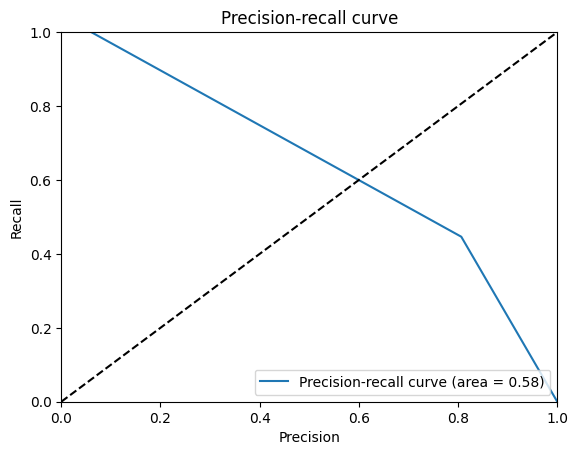

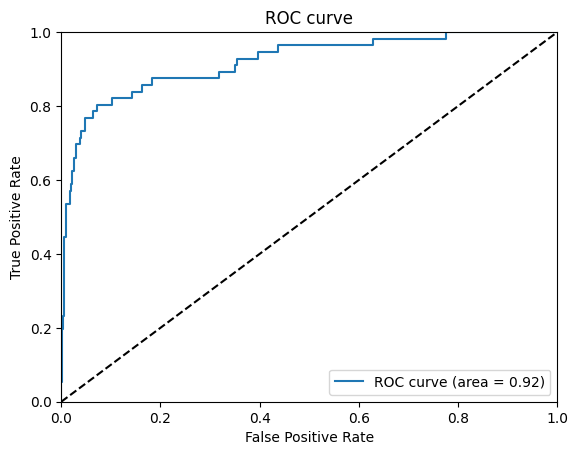

In [27]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

precision, recall, thresholds = precision_recall_curve(y_val, logr.predict(X_val))
pr_auc = auc(precision, recall)
plt.figure()
plt.plot(precision, recall, label='Precision-recall curve (area = %0.2f)' % pr_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-recall curve')
plt.legend(loc="lower right")
plt.show()

fpr, tpr, thresholds = roc_curve(y_val, logr.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

Es muy habitual utilizar estas gráficas, especialmente la curva ROC, para decidir si los resultados son satisfactorios. Cuanto mayor sea el área que queda bajo la curva, mejores son los resultados del modelo que estamos probando.

Utiliza gráficas (estas u otras que puedas encontrar útiles) para hacer una valoración final de los resultados. Razona las conclusiones.

* http://scikit-learn.org/stable/modules/model_evaluation.html
* http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [24]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
def show_recall_and_roc(model_to_show, model_name):
    precision, recall, _ = precision_recall_curve(y_val, model_to_show.predict(X_val))
    print(precision)
    pr_auc = auc(precision, recall)
    plt.figure()
    plt.plot(precision, recall, label='Precision-recall curve (area = %0.2f)' % pr_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.title(f'Precision-recall curve {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    fpr, tpr, _ = roc_curve(y_val, model_to_show.predict_proba(X_val)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

[0.06040992 0.59677419 1.        ]


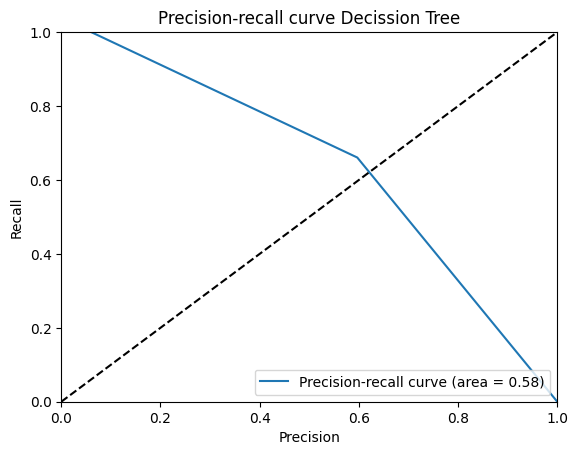

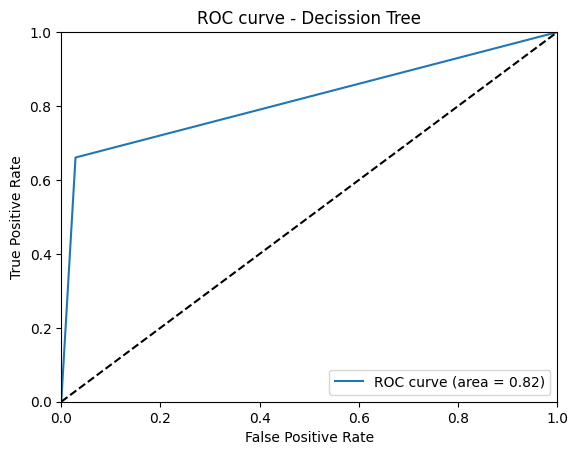

[0.06040992 0.80645161 1.        ]


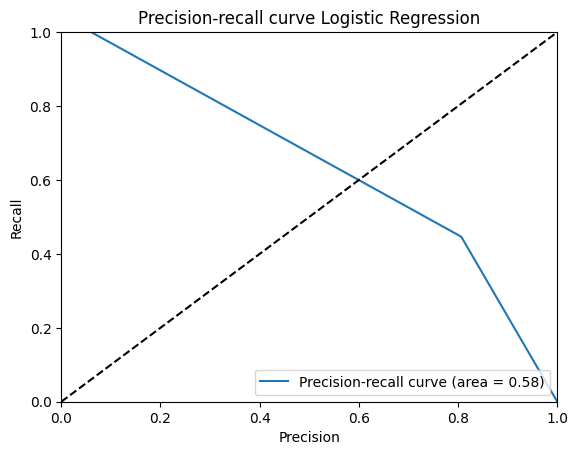

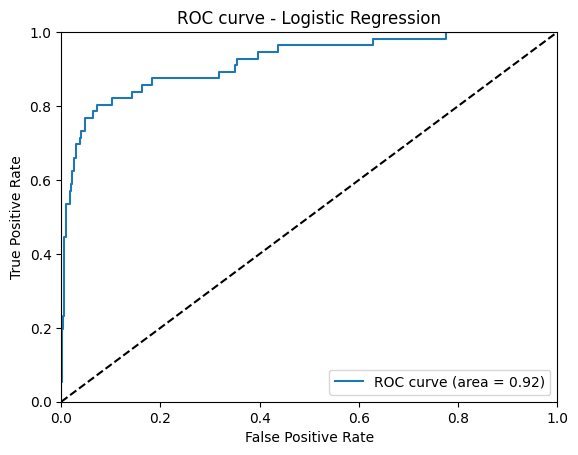

In [26]:
show_recall_and_roc(modelo_arbol, "Decission Tree")
show_recall_and_roc(logr, "Logistic Regression")


Antes dije que el modelo de arbol de decissión era el más adecuado,haciendo las gráficas para la valoración de los modelos, puedo apreciar que el modelo mejor acertado es el de la Regressión Liníal, ya que el area de la ROC curve nos ofrece una mejor predicción, lo que significa que tiene alta sensibilidad y baja tasa de falsas alarmas.
Aparte podemos ver que la curva del precision recall es igual que la del decisión tree. Creo que este modelo clasificara de manera correcta para predecir si un cliente comprara un seguro o no
